# Newtork Tour of mice genetics

In [2]:
import numpy as np
import pandas as pd
import glob

### Loading the data

In [3]:
DATA_DIR = "../../Data/"

In [4]:
pheno = pd.read_csv(DATA_DIR+'Phenotype.txt', sep="\t", index_col="PhenoID")
pheno.head()

,B6D2F1,D2B6F1,C57BL.6J,DBA.2J,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
PhenoID,,,,,,,,,,,,,,,,,,,,,
X3063,NaN,NaN,1254.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,707.929,1481.930,NaN,577.571,1971.000,NaN
X3352,NaN,NaN,724.205,NaN,NaN,NaN,NaN,700.643,1304.79,NaN,...,NaN,NaN,NaN,NaN,525.393,765.048,NaN,579.286,691.286,NaN
X1093,NaN,NaN,887.500,507.40,NaN,NaN,NaN,NaN,NaN,NaN,...,366.5,NaN,NaN,NaN,472.640,1060.340,1032.26,646.000,978.000,NaN
X2256,NaN,NaN,607.708,460.07,NaN,NaN,NaN,NaN,NaN,NaN,...,236.4,NaN,NaN,NaN,426.500,788.400,965.60,563.900,1272.400,NaN
X830,NaN,NaN,35444.000,25325.00,NaN,NaN,NaN,NaN,NaN,NaN,...,21515.0,NaN,NaN,NaN,21898.000,38538.000,36348.00,26982.000,39328.000,NaN


In [5]:
mapBXD = pd.read_csv(DATA_DIR+'map_BXD.txt', sep="\t", index_col="SNP")
mapBXD.head()

,Chr,Pos
SNP,,
rs31443144,1,3.010274
rs6269442,1,3.492195
rs32285189,1,3.511204
rs258367496,1,3.659804
rs32430919,1,3.777023


In [6]:
phenoID = pd.read_csv(DATA_DIR+'Phenotypes_id_aligner.txt', sep="\t", index_col = "PhenoID", encoding = "ISO-8859-1")
phenoID.head()

,PhenoID.1,RecordID,Phenotype,Shown_pheno,Category,Category_ID,color,Phenotype_post,Phenotype_pre,Authors,Senior.Author,Abbreviation,Quantitive.trait,Tissues,Diet,Strains
PhenoID,,,,,,,,,,,,,,,,
X3063,3063,12890,"Central nervous system, metabolism, behavior: ...","Activity of 13-week old females, total counts ...",Activity,1.0,1.0,"Central nervous system, metabolism, behavior: ...","Central nervous system, metabolism, behavior: ...","Andreux P, Williams EG, Koutnikova H, Houtkoop...",Auwerx_1,Activity of 13-week old females,Yes,muscle,NaN,19
X3352,3352,12960,"Central nervous system, metabolism, behavior: ...","Activity of 13-week old males, total counts of...",Activity,2.0,1.0,"Central nervous system, metabolism, behavior: ...","Central nervous system, metabolism, behavior: ...","Andreux P, Williams EG, Koutnikova H, Houtkoop...",Auwerx_1,Activity of 13-week old males,Yes,muscle,NaN,30
X1093,1093,15698,"Metabolism, behavior: Activity (ambulations) a...","Activity (ambulations) at night, metabolic cag...",Activity,3.0,1.0,"Metabolism, behavior: Activity (ambulations) a...",Trait_137_AUW-BXD,"Williams EG, Andreux P, Houtkooper R, Auwerx J",Auwerx_2,Activty (ambulations)_night_CD_AUC,Yes,muscle,NaN,42
X2256,2256,15699,"Metabolism, behavior: Activity (ambulations) a...","Activity (ambulations) at night, metabolic cag...",Activity,4.0,1.0,"Metabolism, behavior: Activity (ambulations) a...",Trait_138_AUW-BXD,"Williams EG, Andreux P, Houtkooper R, Auwerx J",Auwerx_2,Activty (ambulations)_night_HFD_AUC,Yes,muscle,HFD,40
X830,830,17629,"Metabolism, behavior: Activity (movement) at d...","Activity (movement) at dark phase (night) _CD,...",Activity,5.0,1.0,"Metabolism, behavior: Activity (movement) at d...","Metabolism, behavior: Activity (movement) at d...","Williams EG, Wu Y, Jha P, Dubuis S, Amariuta T...",Auwerx_2,Activity (movement) at_night_CD [AUC],Yes,muscle,NaN,45


In [31]:
geno = pd.read_csv(DATA_DIR+'Genotype_BXD.txt', sep="\t", index_col=["SNP"])
geno.head()

,B6D2F1,D2B6F1,C57BL.6J,DBA.2J,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
SNP,,,,,,,,,,,,,,,,,,,,,
rs31443144,0,0,-1,1,-1,-1,1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
rs6269442,0,0,-1,1,-1,-1,1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
rs32285189,0,0,-1,1,-1,-1,1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
rs258367496,0,0,-1,1,-1,-1,1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1
rs32430919,0,0,-1,1,-1,-1,1,1,1,-1,...,-1,1,-1,1,1,-1,-1,-1,-1,-1


In [8]:
filenames = glob.glob(DATA_DIR+"expression data" + "/*.txt")

dfs = [pd.read_csv(f, sep="\t") for f in filenames]

expression = pd.concat(dfs, ignore_index=True, sort=False)

In [9]:
expression = expression.set_index(["gene"])
expression.head()

,C57BL.6J,DBA.2J,BXD68,BXD43,BXD44,BXD45,BXD48,BXD49,BXD50,BXD51,...,BXD54,BXD59,BXD72,BXD76,BXD78,BXD86,BXD88,BXD91,BXD93,BXD94
gene,,,,,,,,,,,,,,,,,,,,,
Nmt1_10338077,11.150,11.440,11.280,11.702,11.654,11.404,11.453,11.169,11.652,11.492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Psmb5_10338095,12.906,13.125,13.144,13.099,13.071,13.048,12.825,12.993,12.915,13.142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hdac5_10338098,9.060,9.563,9.059,9.425,9.245,8.998,8.836,9.120,9.343,9.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dlg1_10338109,7.226,6.781,3.735,5.143,4.652,7.637,8.119,7.908,7.954,8.832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wars_10338116,10.601,10.554,10.742,10.298,10.520,10.795,10.247,10.807,10.572,10.366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

In [10]:
pheno.shape, phenoID.shape,expression.shape,mapBXD.shape,geno.shape

((5092, 97), (5092, 16), (1214846, 97), (7324, 2), (7324, 97))

In [11]:
phenoID["Category"].unique()

array(['Activity', 'Anxiety', 'Drug response', 'Hematology', 'Immune',
       'Metabolism', 'Metabolites', 'Microbiome', 'Morphology',
       'Musculoskeletal', 'Nervous system', 'Other'], dtype=object)

In [12]:
phenoID[phenoID["Shown_pheno"].str.contains("body weight")].shape

(120, 16)

### Graphs construction

<div class="alert alert-block alert-info"><b>Potential protein: </b>
     Nodes = gene expressions level, edges = Gene expression level correlation distance</div>

In [89]:
import networkx as nx
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
from scipy.stats import zscore

In [90]:
expressionEye = pd.read_csv(DATA_DIR+"expression data" + "/EYE.txt", sep="\t", index_col=["gene"])
expressionEye = expressionEye.iloc[:1000,:]

In [91]:
expressionEye = expressionEye.astype("float32")
expressionEye

,B6D2F1,C57BL.6J,DBA.2J,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,...,BXD86,BXD87,BXD89,BXD90,BXD65b,BXD48a,BXD65a,BXD98,BXD99,D2B6F1
gene,,,,,,,,,,,,,,,,,,,,,
Copg_1415670_at,9.790,9.917,9.690,9.852,9.920,9.657,9.793,9.828,9.544,9.728,...,9.732,9.916,9.670,9.894,9.834,9.792,9.827,9.578,9.855,9.762
Atp6v0d1_1415671_at,12.184,12.133,12.148,12.088,12.104,12.227,12.063,12.204,11.847,12.131,...,12.224,12.118,12.092,12.125,12.133,12.052,12.215,12.226,12.299,12.138
Golga7_1415672_at,12.116,12.104,12.108,12.068,12.084,12.062,12.170,12.039,12.305,12.056,...,11.969,12.170,12.188,12.048,12.054,12.125,12.150,11.908,12.009,12.145
Psph_1415673_at,9.003,9.187,9.192,8.952,9.128,8.942,9.041,9.066,9.239,9.124,...,9.117,9.211,9.099,8.846,9.120,9.035,9.334,8.578,9.342,8.981
Trappc4_1415674_a_at,10.790,10.763,10.749,10.815,10.784,10.762,10.743,10.522,10.560,10.725,...,10.932,10.534,10.584,10.578,10.874,10.825,10.678,10.626,10.790,10.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Coq7_1416665_at,11.078,11.257,10.965,11.165,11.278,11.017,11.388,11.064,11.006,11.238,...,11.108,11.090,10.928,10.796,10.843,11.250,11.455,10.727,11.029,11.032
Serpine2_1416666_at,11.414,11.788,11.680,11.817,11.664,11.478,11.724,11.587,11.356,11.730,...,11.500,12.018,11.984,11.663,11.142,12.145,11.826,11.535,11.412,11.581
Ebp_1416667_at,10.402,10.458,10.329,10.355,10.689,10.704,10.452,10.472,10.168,10.372,...,10.338,10.343,9.811,10.191,10.378,10.454,10.150,10.218,10.683,10.540


In [66]:
#expressionEye = expressionEye.reset_index(drop=True).transpose()
#expressionEye

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
B6D2F1,9.790,12.184,12.116,9.003,10.790,10.265,12.152,10.914,11.704,12.212,...,9.637,7.510,7.943,12.073,8.406,11.078,11.414,10.402,11.278,13.052
C57BL.6J,9.917,12.133,12.104,9.187,10.763,10.271,12.169,10.950,11.728,12.300,...,9.893,7.678,7.924,12.028,8.552,11.257,11.788,10.458,11.206,12.992
DBA.2J,9.690,12.148,12.108,9.192,10.749,10.243,12.116,10.995,12.015,12.194,...,9.310,6.893,8.038,12.003,8.850,10.965,11.680,10.329,11.537,13.146
BXD1,9.852,12.088,12.068,8.952,10.815,10.104,12.159,10.946,11.952,12.410,...,9.676,6.700,7.964,12.114,9.570,11.165,11.817,10.355,11.098,13.267
BXD2,9.920,12.104,12.084,9.128,10.784,10.248,12.150,10.864,11.439,12.144,...,10.128,8.066,7.900,12.042,9.141,11.278,11.664,10.689,11.378,13.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BXD48a,9.792,12.052,12.125,9.035,10.825,10.141,12.144,11.038,11.605,12.082,...,9.760,7.660,7.886,11.996,8.790,11.250,12.145,10.454,11.320,13.097
BXD65a,9.827,12.215,12.150,9.334,10.678,9.801,12.044,10.831,11.669,11.965,...,9.942,7.357,7.883,11.940,8.322,11.455,11.826,10.150,11.422,13.066
BXD98,9.578,12.226,11.908,8.578,10.626,9.996,12.010,10.675,11.817,12.099,...,9.665,7.236,8.014,11.724,8.584,10.727,11.535,10.218,11.168,13.134
BXD99,9.855,12.299,12.009,9.342,10.790,10.292,12.170,11.058,11.806,12.307,...,9.321,6.796,7.961,12.144,8.943,11.029,11.412,10.683,11.239,12.990


In [67]:
#Normalization of gene expressions.
#expressionEye = zscore(expressionEye,axis=1)

In [92]:
#metrics "correlation" same as ""cosine" but substract the mean from the vectors.
distances = squareform(pdist(expressionEye, metric='correlation'))
distances

array([[0.        , 0.79897363, 1.27276606, ..., 0.78753788, 1.37563411,
        1.34336298],
       [0.79897363, 0.        , 1.40562531, ..., 0.71208707, 1.37485061,
        1.35273992],
       [1.27276606, 1.40562531, 0.        , ..., 1.01770222, 0.63489756,
        0.68395287],
       ...,
       [0.78753788, 0.71208707, 1.01770222, ..., 0.        , 1.2964755 ,
        1.04706984],
       [1.37563411, 1.37485061, 0.63489756, ..., 1.2964755 , 0.        ,
        0.83806647],
       [1.34336298, 1.35273992, 0.68395287, ..., 1.04706984, 0.83806647,
        0.        ]])

In [93]:
#adjacency unweighted
threshold = np.mean(distances)
adjacency = np.zeros_like(distances)
adjacency[distances < threshold] = 1
adjacency[distances >= threshold] = 0
np.fill_diagonal(adjacency, 0)
adjacency

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

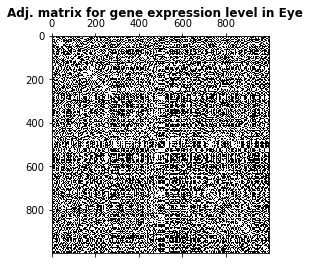

In [94]:
plt.spy(adjacency)
plt.suptitle("Adj. matrix for gene expression level in Eye", fontweight='bold')
plt.show()

### Clustering

In [95]:
#first create the weighted adjacency

kernel_width = distances.mean()
weights_matrix = np.exp(-distances**2 / kernel_width**2)

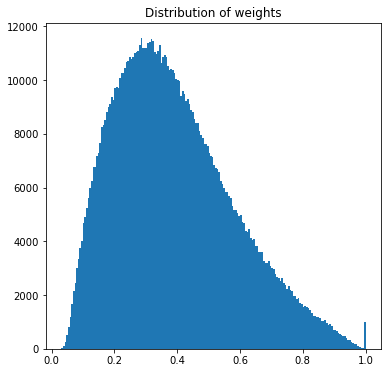

In [96]:
plt.figure(figsize=(6,6))
plt.hist(weights_matrix.flatten(),bins="auto")
plt.title('Distribution of weights')
plt.show()

In [97]:
#threshold 
weights_matrix[weights_matrix < 0.9] = 0


In [98]:
import networkx as nx
graph = nx.from_numpy_array(weights_matrix)

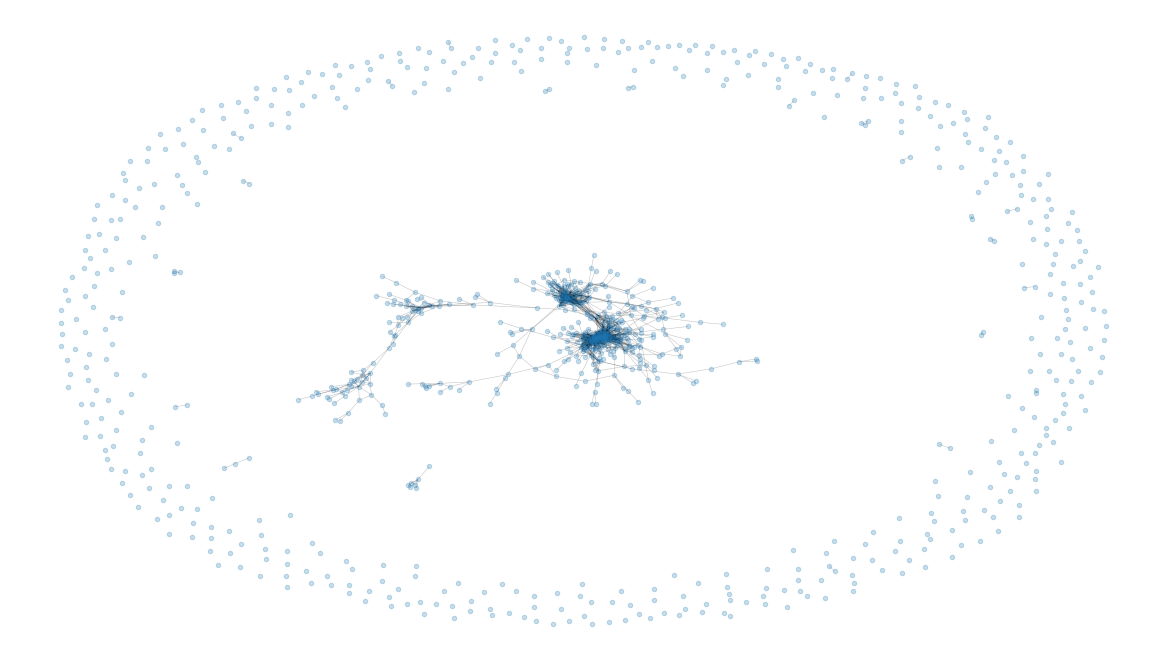

In [99]:
plt.figure(figsize=(16,9))

nx.draw(graph,node_size=20,width=0.5, alpha=0.25)